# Text scraping word cloud

In [1]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
import re
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
from os import path, getcwd
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
def get_soup(html):
    """Get data for webpage."""
    resp = requests.get(html)
    http_encoding = resp.encoding if "charset" in resp.headers.get("content-type", "").lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, from_encoding=encoding, features="lxml")
    return soup

In [3]:
def get_links(soup):
    """Get links from a webpage."""
    http_link_list = []
    for link in soup.find_all("a", href=True):
        if link["href"][0] != "/":
            http_link_list.append(link["href"].strip("'"))
    return http_link_list

In [4]:
def get_ps(soup):
    """Get <p> tags from website."""
    ps_list = []
    for ps in soup.find_all("p"):
        ps_list.append(ps.get_text())
    return ps_list

In [5]:
def get_text(text_arr):
    """Get text from an array."""
    text = " ".join(text_arr)
    return text

In [6]:
def get_blog_text(blog_list):
    """Get text from all blogs in list."""
    text_return = []
    for i in blog_list:
        soup = get_soup(i)
        text_arr = get_ps(soup)
        full_text = get_text(text_arr)
        text_return.append(full_text)
    return text_return

In [7]:
#site = "https://thebibleproject.com/blog/"
site = "https://scienceblog.com/"
site_soup = get_soup(site)
h_links = get_links(site_soup)
regex = re.compile(r'(\d{6})')
h_links = [i for i in h_links if regex.search(i)]
h_links

['https://scienceblog.com/512302/rapamycin-may-slow-skin-aging-drexel-study-reports/',
 'https://scienceblog.com/512302/rapamycin-may-slow-skin-aging-drexel-study-reports/',
 'https://scienceblog.com/512302/rapamycin-may-slow-skin-aging-drexel-study-reports/',
 'https://scienceblog.com/512301/all-the-feels-feeling-loved-in-everyday-life-linked-with-improved-well-being/',
 'https://scienceblog.com/512301/all-the-feels-feeling-loved-in-everyday-life-linked-with-improved-well-being/',
 'https://scienceblog.com/512301/all-the-feels-feeling-loved-in-everyday-life-linked-with-improved-well-being/',
 'https://scienceblog.com/512298/practicing-gratitude-can-have-profound-health-benefits-usc-experts-say/',
 'https://scienceblog.com/512298/practicing-gratitude-can-have-profound-health-benefits-usc-experts-say/',
 'https://scienceblog.com/512298/practicing-gratitude-can-have-profound-health-benefits-usc-experts-say/',
 'https://scienceblog.com/512295/transmission-of-river-blindness-may-be-reduced

In [8]:
text_return_list = get_blog_text(h_links)
all_text = get_text(text_return_list)

In [9]:
wc = WordCloud(background_color="white", max_words=20000, max_font_size=90, random_state=1, stopwords=STOPWORDS)
wc.generate(all_text)

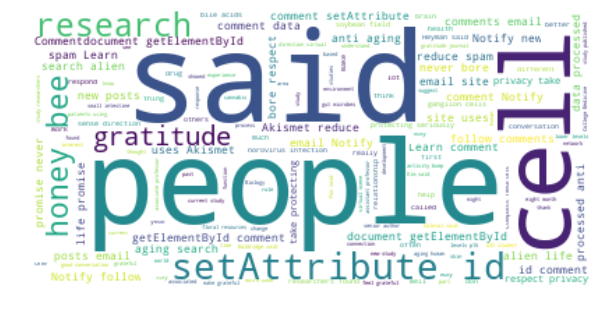

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()